In [44]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

df = pd.read_csv("Practico_01_counts.csv")
# df.describe()


In [26]:
from collections import Counter
import seaborn as sns

a = Counter(df["insectos"])
a

Counter({2: 11, 3: 15, 5: 7, 1: 5, 4: 5, 8: 2, 6: 1, 0: 3, 7: 1})

In [56]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm

In [42]:
# poisson.pmf(df["insectos"], mu=1)
# poisson.logpmf(df["insectos"], mu=1)
# sum(poisson.logpmf(df["insectos"], mu=1))

def LPoisson (d, mu=1):
    return sum(poisson.logpmf(d, mu=mu))



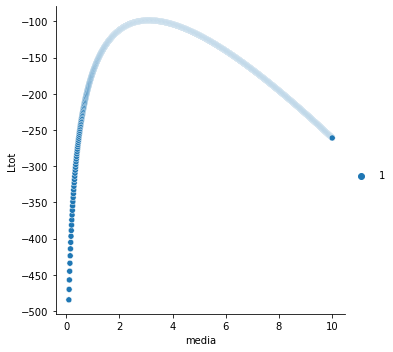

In [45]:
exp = pd.DataFrame.from_dict({"media": np.linspace(start=0.1, stop=10, num=990)})

exp["Ltot"] = exp["media"].apply(lambda x: LPoisson(df["insectos"], x))
exp

sns.relplot(data=exp, x="media", y="Ltot", hue=1)



In [59]:
## slide 21

nrow= 500
df_1  = pd.DataFrame([None for _ in range(nrow)], columns=["mean"])
df_1.loc[0, "mean"] = 3.5

for i in range(nrow):
    current = df_1.loc[i, "mean"]
    prop = norm(loc=current, scale=0.5)
    post_prop = LPoisson(df["insectos"], prop)

